In [8]:
%matplotlib inline

# Advanced numerical computations and plotting

## The python scientific ecosystem  - the fundamentals

Python provides several libraries for scientific calculations and visualization

* NumPy : the array data structure and linear algebra
* SciPy : extensive scientific computational library
* Matplotlib : data visualization


### scipy

scipy is a collection of several sub libraries that provide various capabilities:

* Clustering package (**scipy.cluster**)
* Constants (**scipy.constants**)
* Discrete Fourier transforms (**scipy.fftpack**)
* Integration and ODEs (**scipy.integrate**)
* Interpolation (**scipy.interpolate**)
* Input and output (**scipy.io**)
* Linear algebra (**scipy.linalg**)
* Miscellaneous routines (**scipy.misc**)
* Multi-dimensional image processing (**scipy.ndimage**)
* Orthogonal distance regression (**scipy.odr**)
* Optimization and Root Finding (**scipy.optimize**)
* Signal processing (**scipy.signal**)
* Sparse matrices (**scipy.sparse**), linear algebra (**scipy.sparse.linalg**) and graphs routines (**scipy.sparse.csgraph**)
* Spatial algorithms and data structures (**scipy.spatial**)
* Special functions (**scipy.special**)
* Statistical functions (**scipy.stats**)

## Visualize the data

The first step when exploring data is to visualize them.

There are several libraries to do it, but matplotlib is the most common and is quite simple to use.

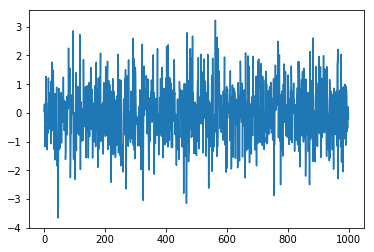

In [9]:
import matplotlib.pylab as plt
import numpy as np
data = np.random.randn(1000) 

fig, ax = plt.subplots()

ax.plot(data)

## Are my data really gaussian?

I can use an histogram to check that

(array([ 10.,  40.,  75., 191., 219., 225., 159.,  63.,  14.,   4.]),
 array([-2.92641215, -2.32024046, -1.71406876, -1.10789707, -0.50172537,
         0.10444632,  0.71061801,  1.31678971,  1.9229614 ,  2.5291331 ,
         3.13530479]),
 <a list of 10 Patch objects>)

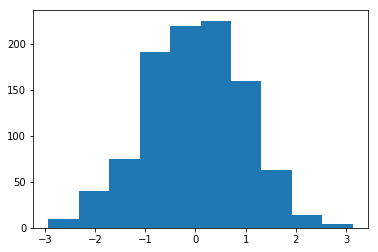

In [10]:
data = np.random.randn(1000) 

fig, ax = plt.subplots()

ax.hist(data)

if I have two dimensional data, I can easily visualize the distribution

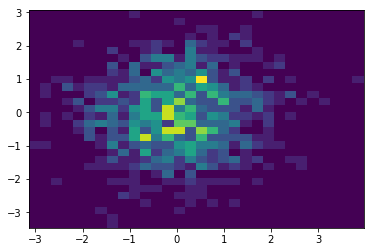

In [13]:
data = np.random.randn(1000, 2) 

fig, ax = plt.subplots()

ax.hist2d(data[:,0], data[:,1], bins = 30)
print()

## How about 3D?

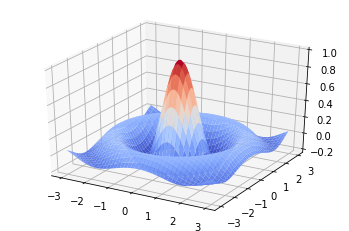

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.mgrid[-3:3:0.05, -3:3:0.05]# creating a bidimensional grid
R = np.sqrt(X**2 + Y**2)
S = np.sinc(R)

surf = ax.plot_surface(X, Y, S, cmap=cm.coolwarm)


## Linear Algebra - LinAlg

Numpy already provides several linear algebra functionality; scipy expands on that

the basic operation for linear algebra is the scalar product between two arrays.
I can obtain it using the `np.dot` function, or the `@` operator

In [34]:
import numpy as np
import scipy as sp

a = np.array([[1,2,3,4,5]])
b = np.array([1,2,3,4,5])
c = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])

print(np.dot(b, b)) # scalar product of b and b
print(sp.dot(b, b))
print(b@b)

print('-'*20)
print(np.dot(c, a.T)) # scalar product of c and a transposed
print(np.dot(a, c.T))
print(a@c.T)

print('-'*20)
print(np.inner(b, c)) # scalar product of b and c (each line of it)
print(np.inner(c, b))
print(c@b)


55
55
55
--------------------
[[ 55]
 [130]
 [205]]
[[ 55 130 205]]
[[ 55 130 205]]
--------------------
[ 55 130 205]
[ 55 130 205]
[ 55 130 205]


## Eigenvalues and eigenvectors

To compute the eigenvalues and eigenvectors of a matrix you can use the `np.linalg.eig` function

In [60]:
a = np.eye(4)+np.random.rand(4,4)
eigenvals, eigenvecs = np.linalg.eig(a)

print ("eigenvalues = \n", eigenvals)

print('-'*20)
print(eigenvals[0])
print(eigenvecs[:, 0])

rescaled = (a@eigenvecs[:, 0])/eigenvals[0]
print(rescaled)

eigenvalues = 
 [2.75387545 0.60523752 0.88322277 1.51060656]
--------------------
2.753875451917299
[-0.64094968 -0.5271169  -0.27193994 -0.48721653]
[-0.64094968 -0.5271169  -0.27193994 -0.48721653]


Often one does not need **all** the eigenvectors or eigenvalues.
Usually one only needs the biggest or the smallest.
There are algorithms that allows to evaluate only those, in particolar useful for sparse matrices

how these eigenvalues are selected is controlled by the `which` parameter:

* 'LM' : largest magnitude (default)
* 'SM' : smallest magnitude
* 'LR' : largest real part
* 'SR' : smallest real part
* 'LI' : largest imaginary part
* 'SI' : smallest imaginary part

In [65]:
eigenval, eigenvec = sp.sparse.linalg.eigs(a, k = 2) # only the first two eigenvalues/vectors
print ("first two eigenvalues = \n", eigenval)

eigenval, eigenvec = sp.sparse.linalg.eigs(a, k = 2, which='SM') # only the first two eigenvalues/vectors
print ("first two eigenvalues = \n", eigenval)

first two eigenvalues = 
 [2.75387545+0.j 1.51060656+0.j]
first two eigenvalues = 
 [0.60523752+0.j 0.88322277+0.j]


## Symbolic math

while not part of scipy, there is a library worth mentioning for symbolic calculus: **sympy**.

it will allow you to define symbols and manipulate them in a way closer to what one would do while doing math.

In [35]:
import sympy

x = sympy.Symbol('x') # declare the symbol `x`
y = 1 + x + x**2 # y is an expression of x
print(y)

x**2 + x + 1


In [36]:
z = y.subs({x : 2}) # replace the value of x inside y
print(z)

7


In [37]:
print (sympy.solve(y, x, dict=True)) # returns all the possible solutions of the equation

[{x: -1/2 - sqrt(3)*I/2}, {x: -1/2 + sqrt(3)*I/2}]


In [39]:
y.diff(x) # derivative of y in respect to x

2*x + 1

## Differential equations

Another important topic is the differential equation integration-

There are several ways of solving them, more or less accurate (Euler, RK2, RK4, RK45)

Scipy provides us with a unified interface for this under the **scipy.integrate** module, and the **odeint** function.

In [73]:
from scipy.integrate import odeint

let's make a simple example:

$ \dot{y} = -\alpha y $

We know that this equation, given a starting point $y(0) = y_0$, will have as a solution an exponential decay with rate $\alpha$

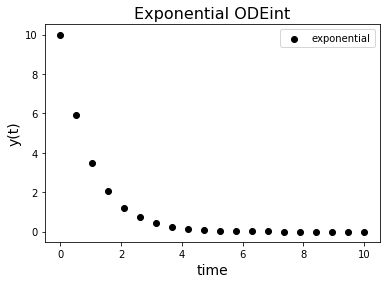

In [76]:
def derivative(y, t):
    return -y

time = np.linspace(0, 10, 20)
y0 = 10.0
# integration of the differential equation: (function, initial condition, time)
yt = odeint(derivative, y0, time) 

fig, ax = plt.subplots()

ax.scatter(time, yt, marker = 'o', color = 'k', label = 'exponential')
ax.set_xlabel('time', fontsize = 14)
ax.set_ylabel('y(t)', fontsize = 14)
ax.set_title('Exponential ODEint', fontsize = 16)
ax.legend(loc = 'best')


## Fitting of a curve

Let's suppose that we want to fit some noisy data that come from an exponential curve (like the one we evaluated earlier)


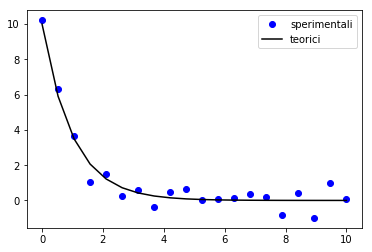

In [85]:
y_obs = yt.ravel() + np.random.randn(len(yt))*0.5

fig, ax = plt.subplots()

ax.plot(time, y_obs, 'bo', label = 'sperimentali')
ax.plot(time, yt, 'k-', label = 'teorici')
ax.legend(loc = 'best')


this fit can be done using the **curve_fit** function from the **scipy.optimize** module.

we need to pass it the complete function that we want to integrate.

In [86]:
from scipy.optimize import curve_fit

def decay_equation(tempo, alfa):
    return 10 * np.exp(-alfa*tempo)

In [87]:
# (function, ascissa, time, initial guess for the parameters)

fit_alfa, var_alfa = curve_fit(decay_equation, time, y_obs, p0=[0.9]) 
std_alfa = np.sqrt(var_alfa)

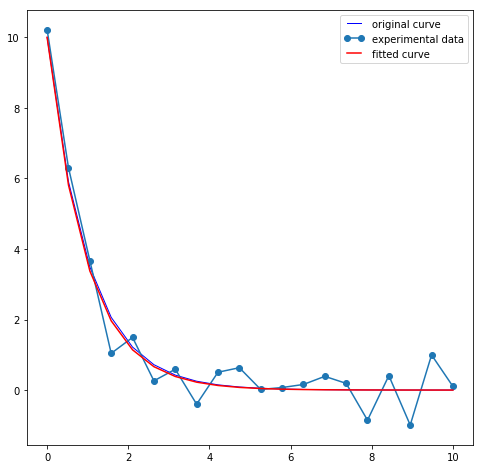

In [88]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(time, yt, color='blue', linewidth=1, label='original curve')
ax.plot(time, y_obs, marker='o', label='experimental data');

y_hat = decay_equation(time, fit_alfa)
ax.plot(time, y_hat, '-r', label='fitted curve');
ax.legend(loc = 'best', numpoints = 2)


## Metropolis Algorithm

Algorithm that can be used to estimate the integral of a function using a Monte-Carlo evaluation.
In this case we will use it to estimate the value ot $\pi$.

We can consider a circle of radius 1, centered in the origin.
This circle has an area of $\pi$
Let's imagine a square inscribing it, centered in the origin as well.
This square has a side of 2, with an area of 4.

If we extract numbers on the plane in the interval $x \in [-1, 1] \, y \in [-1, 1]$
the point will be inside the cirle if 

$$x^2 + y^2 < 1$$

and will be considered a hit.

After a huge number of points, we have that the fraction of points inside the circle should be proportional to the ratio of the area of the circle and the area of the square.
the umbers of hits will therefore be:

$$Hit/Tot = \pi/4$$

you can repeat the simulation `N_runs` times to estimate the precision of your estimate of $\pi$

the following is a very long and slow implementation, can you do better using numpy?

In [72]:
import numpy as np
import time

N = 100000 # number of MC events
N_run = 100 # number of runs
Nhits = 0.0 # number of points accepted
pi = np.zeros(N_run) # values of pi

start_time = time.time() # start clock 
for I in range(N_run):
    Nhits = 0.0
    for i in range(N):
        x = np.random.rand()*2-1
        y = np.random.rand()*2-1
        res = x*x + y*y
        if res < 1:
            Nhits += 1.0
    pi[I] += 4. * Nhits/N

run_time = time.time()

print ("pi with ", N, " steps for ", N_run, " runs is ", np.mean(pi), " in ", run_time-start_time, " sec")
print ("Precision computation : ", np.abs(np.mean(pi)-np.pi))

pi with  100000  steps for  100  runs is  3.1417231999999995  in  20.12169909477234  sec
Precision computation :  0.00013054641020637803
